In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [4]:
DATA_IN_PATH = 'C:/preprocessing/data_in/'
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file : 
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
ratings.txt                   19.72MB
ratings_test.txt              4.94MB
ratings_train.txt             14.78MB


In [5]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter = '\t', quoting = 3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
print(f'전체 학습 데이터의 개수 : {len(train_data)}')

전체 학습 데이터의 개수 : 150000


In [7]:
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

Text(0, 0.5, 'Number of review')

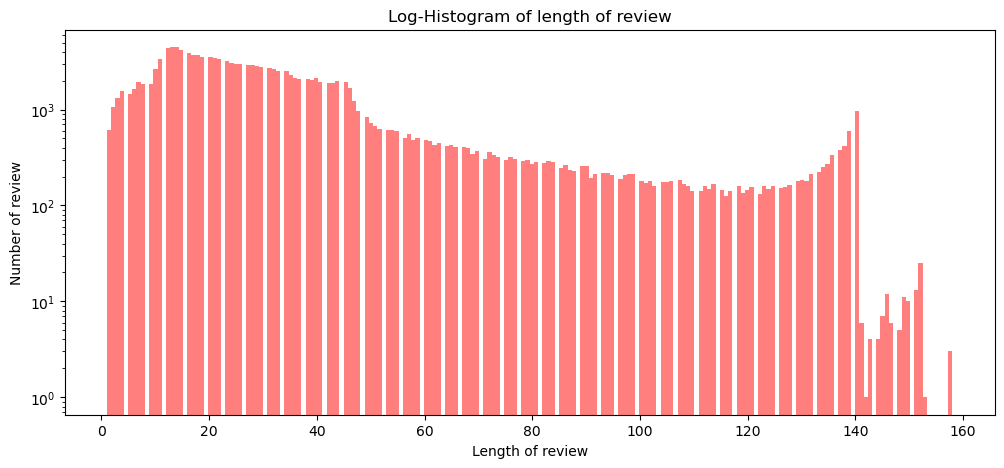

In [9]:
plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [11]:
print(f'리뷰 길이 최댓값 : {np.max(train_length)}')
print(f'리뷰 길이 최솟값 : {np.min(train_length)}')
print(f'리뷰 길이 평균값 : {np.mean(train_length)}')
print(f'리뷰 길이 표준편차 : {np.std(train_length)}')
print(f'리뷰 길이 중간값 : {np.median(train_length)}')
print(f'리뷰 길이 제1사분위 : {np.percentile(train_length, 25)}')
print(f'리뷰 길이 제3사분위 : {np.percentile(train_length, 75)}')

리뷰 길이 최댓값 : 158
리뷰 길이 최솟값 : 1
리뷰 길이 평균값 : 35.23749333333333
리뷰 길이 표준편차 : 29.582262651515517
리뷰 길이 중간값 : 27.0
리뷰 길이 제1사분위 : 16.0
리뷰 길이 제3사분위 : 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2122da5e310>,
 'caps': [<matplotlib.lines.Line2D at 0x2122da5e8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2122da5e040>],
 'medians': [<matplotlib.lines.Line2D at 0x2122da5ee50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2122da6a430>],
 'means': [<matplotlib.lines.Line2D at 0x2122da6a160>]}

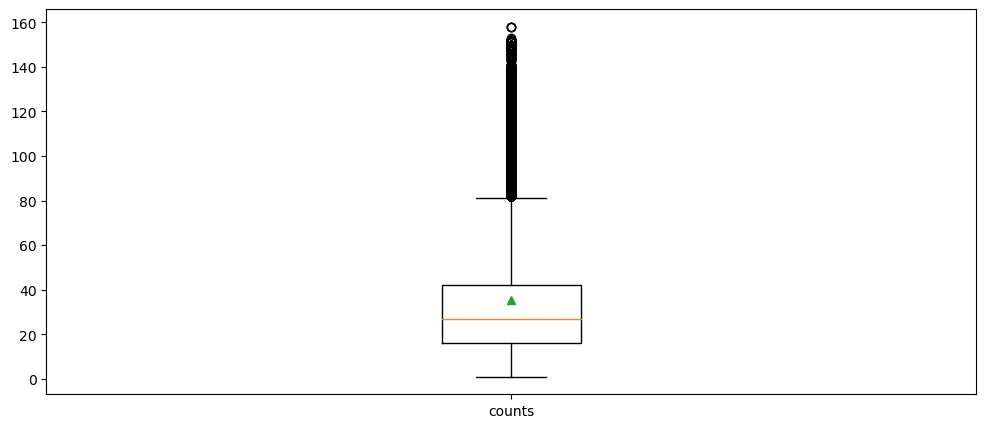

In [12]:
plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

In [13]:
train_review = [review for review in train_data['document'] if type(review) is str]

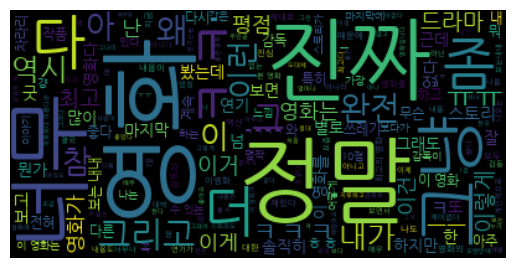

In [15]:
wordcloud = WordCloud(font_path = DATA_IN_PATH + 'NanumGothic.ttf').generate(' '.join(train_review))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:ylabel='count'>

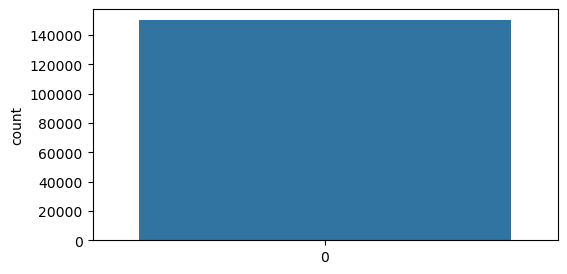

In [19]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['label'])

In [21]:
print(f"긍정 리뷰 개수 : {train_data['label'].value_counts()[1]}")
print(f"부정 리뷰 개수 : {train_data['label'].value_counts()[0]}")

긍정 리뷰 개수 : 74827
부정 리뷰 개수 : 75173


Text(0, 0.5, 'Number of reviews')

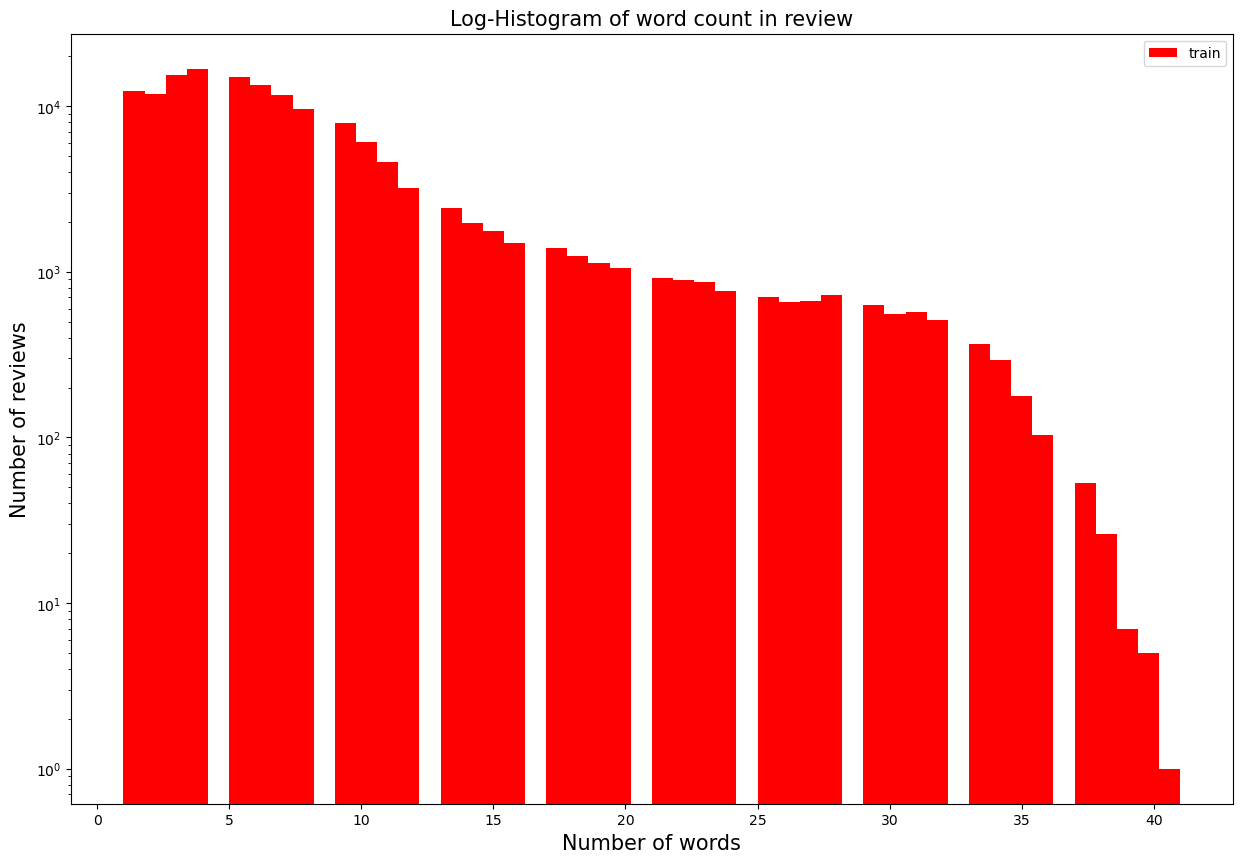

In [22]:
train_word_counts = train_data['document'].astype(str).apply(lambda x:len(x.split(' ')))
plt.figure(figsize=(15,10))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [24]:
print(f'리뷰 길이 최댓값 : {np.max(train_word_counts)}')
print(f'리뷰 길이 최솟값 : {np.min(train_word_counts)}')
print(f'리뷰 길이 평균값 : {np.mean(train_word_counts)}')
print(f'리뷰 길이 표준편차 : {np.std(train_word_counts)}')
print(f'리뷰 길이 중간값 : {np.median(train_word_counts)}')
print(f'리뷰 길이 제1사분위 : {np.percentile(train_word_counts, 25)}')
print(f'리뷰 길이 제3사분위 : {np.percentile(train_word_counts, 75)}')

리뷰 길이 최댓값 : 41
리뷰 길이 최솟값 : 1
리뷰 길이 평균값 : 7.58494
리뷰 길이 표준편차 : 6.514041131514094
리뷰 길이 중간값 : 6.0
리뷰 길이 제1사분위 : 3.0
리뷰 길이 제3사분위 : 9.0


In [25]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x:'?' in x))
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x:'.' in x))

print(f'물음표가 있는 질문 {qmarks * 100}')
print(f'마침표가 있는 질문 {fullstop * 100}')

물음표가 있는 질문 8.247333333333334
마침표가 있는 질문 51.76333333333333


In [26]:
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter='\t', quoting=3)
train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [40]:
review_text = re.sub("[^가-힣ㄱ-하-ㅣ\\s]", "", train_data['document'][0])
print(review_text)

아 더빙 진짜 짜증나네요 목소리


In [41]:
okt = Okt()
review_text = okt.morphs(review_text, stem=True)
print(review_text)

['아', '더빙', '진짜', '짜증나다', '목소리']


In [42]:
stop_words = set(['은', '는', '이','가','하','아','것','들','의','있','되','수','보','주','등','한'])
clean_review = [token for token in review_text if not token in stop_words]
clean_review

['더빙', '진짜', '짜증나다', '목소리']

## 전처리 과정을 함수로 만듬

In [56]:
def preprocessing(review, okt, remove_stopwords = False, stop_words = []) :
    review_text = re.sub("[^가-힣ㄱ-하-ㅣ\\s]", "", review)   ## 한글, 공백 제외 모두 지우기
    word_review = okt.morphs(review_text, stem=True)         ## okt 객체를 활용해 형태소 단위로 나눔
    if remove_stopwords:    ## 불용어 제거 (선택적)
        word_review = [token for token in word_review if not token in stop_words]
    return word_review

In [57]:
stop_words = set(['은', '는', '이','가','하','아','것','들','의','있','되','수','보','주','등','한'])
okt = Okt()
clean_train_review = []

for review in train_data['document']:
    ## 비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words = stop_words))
    else : 
        clean_train_review.append([])  # string이 아니면 비어있는 값 추가
clean_train_review[:4]

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

오타가 있는 것이 보이더라도 전체 데이터에 대해 모두 수정할 수 없으니 어쩔 수 없는 부분으로 생각하고 넘어간다.

평가 데이터도 동일하게 진행하기 때문에 평가데이터를 불러와서 앞 과정을 똑같이 수행한다.

In [58]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt', header=0, delimiter = '\t', quoting = 3)

clean_test_review = []

for review in test_data['document']:
    ## 비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words = stop_words))
    else : 
        clean_test_review.append([])  # string이 아니면 비어있는 값 추가
clean_test_review[:4]

[['굳다', 'ㅋ'],
 [],
 ['뭐', '야', '평점', '나쁘다', '않다', '점', '짜다', '리', '더', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]

이제 인덱스 벡터로 바꾼 후 패딩 처리만 하면 모든 전처리 과정이 끝난다  
???   
텐서플로이 전처리 모듈을 사용하는데 토크나이징 객체를 만든 후 학습 데이터에 대해서만 적용하고 해당 객체를 사용해 두 ㄷ데이터를 인덱스 벡터로 만들자. 그다음 마지막으로 해당 데이터들을 패딩 처리하면 된다.

In [62]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index  ## 단어 사전 형태
MAX_SEQUENCE_LENGTH = 8 ## 문장(패딩) 최대 길이 : 대략적인 문장 평균

train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')   ## 학습 데이터를 벡터화
train_labels = np.array(train_data['label'])   ## 학습데이터 라벨
test_inputs = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')     ## 평가 데이터를 벡터화
test_labels = np.array(test_data['label'])     ## 평가데이터 라벨

In [72]:
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1   ## vocab_size 추가

if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
    
## 전처리된 학습/평가 데이터를 넘파이 형태로 저장
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

## 데이터 사전을 json 형태로 저장
json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w', encoding='utf-8'), ensure_ascii=False)

이 오류 때문에 encoding='utf-8' 추가
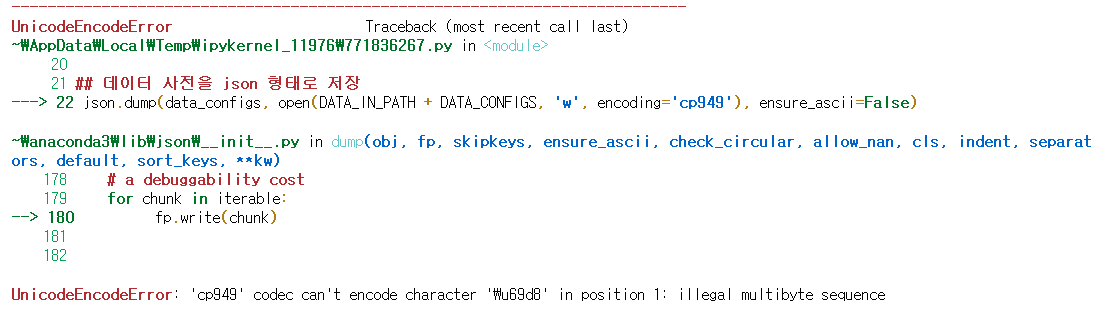

## 감정분석을 위한 모델링
영어 텍스트 분류 모델과 비슷  여러 모델 중 여기서는 **CNN** 사용

In [74]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
from tqdm import tqdm

In [76]:
DATA_OUT_PATH = "C:/prerprocessing/data_out/"
INPUT_TRAIN_DATA = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA = 'nsmc_train_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_IN_PATH + INPUT_TRAIN_DATA, 'rb'))
train_input = pad_sequences(train_input, maxlen=train_input.shape[1])
train_label = np.load(open(DATA_IN_PATH + LABEL_TRAIN_DATA, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r', encoding='utf-8'))

### 하이퍼파라미터 정의

In [79]:
model_name = 'cnn_classifier_kr'
BATCH_SIZE = 512
NUM_EPOCHS = 2
VALID_SPLIT = 0.1
MAX_LEN = train_input.shape[1]

## __init__ 함수의 파라미터에 입력하기 위해 dict로 저장
kargs = {'model_name' : model_name, 
         'vocab_size':prepro_configs['vocab_size'],
         'embedding_size':128,
         'num_filters':100,
         'dropout_rate':0.5,
         'hidden_dimension':250,
         'output_dimension':1}

### 모델 함수
간단하게 구현한 모델이므로 성능을 높이고 싶다면 더 깊은 모델을 만들어야 함


In [97]:
class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                         output_dim = kargs['embedding_size'])
        self.conv_list = [
            layers.Conv1D(filters=kargs["num_filters"],
                         kernel_size = kernel_size,
                         padding="valid",
                         activation=tf.keras.activations.relu,
                         kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.),)
            for kernel_size in [3,4,5]
        ]
        
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                               activation=tf.keras.activations.relu,
                               kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                               activation=tf.keras.activations.sigmoid,
                               kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

### 모델 학습

In [98]:
model = CNNClassifier(**kargs)

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [135]:
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=2)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print(f"{checkpoint_dir} -- Folder already exsis \n")
else:
    os.makedirs(checkpoint_dir, exist_ok = True)
    print(f"{checkpoint_dir} -- Folder create complete \n")
    
cp_callback = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, save_weights_only=True)
history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                   validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

C:/prerprocessing/data_out/cnn_classifier_kr -- Folder already exsis 

Epoch 1/40
264/264 [==============================] - ETA: 0s - loss: 0.2201 - accuracy: 0.9104
Epoch 1: val_accuracy improved from -inf to 0.81640, saving model to C:/prerprocessing/data_out/cnn_classifier_kr\weights.h5
264/264 [==============================] - 37s 141ms/step - loss: 0.2201 - accuracy: 0.9104 - val_loss: 0.4450 - val_accuracy: 0.8164
Epoch 2/40
264/264 [==============================] - ETA: 0s - loss: 0.1948 - accuracy: 0.9211
Epoch 2: val_accuracy improved from 0.81640 to 0.82040, saving model to C:/prerprocessing/data_out/cnn_classifier_kr\weights.h5
264/264 [==============================] - 36s 136ms/step - loss: 0.1948 - accuracy: 0.9211 - val_loss: 0.4687 - val_accuracy: 0.8204
Epoch 3/40
264/264 [==============================] - ETA: 0s - loss: 0.1743 - accuracy: 0.9293
Epoch 3: val_accuracy did not improve from 0.82040
264/264 [==============================] - 36s 137ms/step - loss: 0.1

In [154]:
history.history['loss'],history.history['val_loss']

([0.2200566530227661,
  0.19483523070812225,
  0.17430125176906586,
  0.15981468558311462],
 [0.4450419247150421,
  0.4686894118785858,
  0.4951476454734802,
  0.5120770335197449])

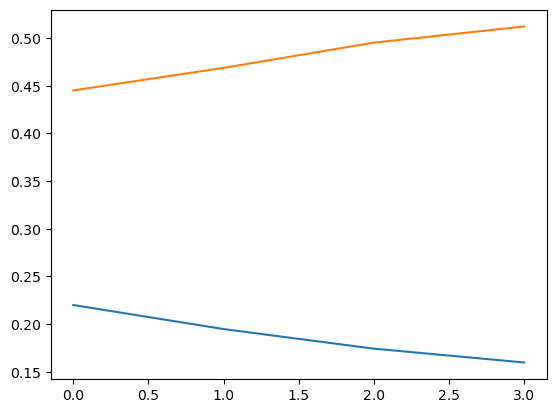

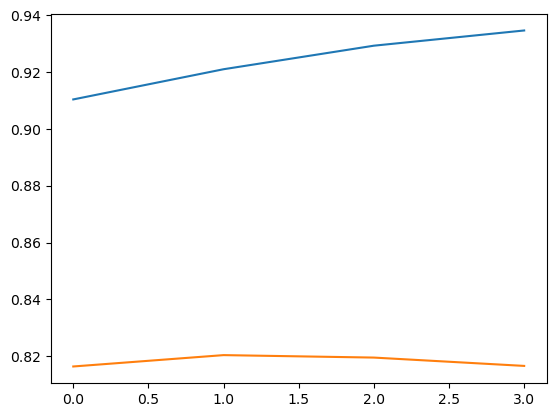

In [157]:
## 성능 그래프 출력
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

그래프를 보면 과적합이 심한편 아닌가 ..?

### 모델 테스트
앞선 영어 모델의 경우 데이터에 감정에 대한 라벨 값이 없었기 때문에 예측값만 만든 후 캐글에 제출해서 정확도를 확인했지만, 한글 데이터의 경우 라벨이 있으므로 검증 과정처럼 바로 결과를 확인할 수 있다.

In [159]:
INPUT_TEST_DATA = 'nsmc_train_input.npy'
LABEL_TEST_DATA = 'nsmc_train_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_IN_PATH + INPUT_TEST_DATA, 'rb'))
test_input = pad_sequences(test_input, maxlen=test_input.shape[1])
test_label = np.load(open(DATA_IN_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))
model.evaluate(test_input, test_label)

4688/4688 [==============================] - 20s 4ms/step - loss: 0.1541 - accuracy: 0.9441


[0.15410713851451874, 0.9440733194351196]

정확도 82.74라면 높지는 않지만 준수한 편.  
이제 점수를 높이기 위해 모델링을 사용해 점수를 직접 높여보자

In [164]:
sen = '나는 파란 머리에 하얀피부를 가진 남자가 좋아'
clean_sen = []

clean_sen.append(preprocessing(sen,okt,remove_stopwords=True, stop_words=stop_words))

clean_sen

[['나', '파란', '머리', '에', '하얗다', '피부', '를', '가지다', '남자', '좋다']]